### Assignment #2 Chapter 3 - Linear Regression
### David Perry - sez326

### 3.2 Carefully explain the differences between the KNN classifier and KNN regression methods.

Given a value for K and a test observation X{o}, both the KNN classifier and KNN regression first identify the K training observations that are closest to X{o}, represented by N{o}.  For the KNN classifier, X{o} would be a discrete class, and for KNN regression, X{o} would be a continuous value.  The methods then diverge in what they do with N{o}.

The KNN classifier then estimates the conditional probability that the test observation Xo belongs to class j as the fraction of training observations in N{o} whose response value y{i} equals *j*.

KNN regression on the other hand, estimates f(X{o}) using the average of all of the training observations in N{o}.

There are distinct differences between the KNN classifier and the KNN regression methods.  The main difference between the two methods is that the KNN classifier method is used to predict what class an observation likely belongs to based on the classes of its K nearest neighbor(s), whereas the KNN regression method is used to predict what \value\ an observation will have on a response variable based on the response values of its K nearest neighbor(s). 


### 3.9.  This question involves the use of multiple linear regression on the Auto data set. 

In [357]:
#Perform standard import of packages, etc. 

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

sns.set(style = 'white')
plt.style.use('seaborn-white')

In [358]:
#Loading the data set.
auto_df = pd.read_csv('C:/Users/david/Documents/Predictive Modeling/auto.csv')
auto_df = pd.read_csv('C:/Users/david/Documents/Predictive Modeling/auto.csv', na_values = '?').dropna()
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### 3.9a.  Produce a scatterplot matrix which includes all of the variables in the data set.

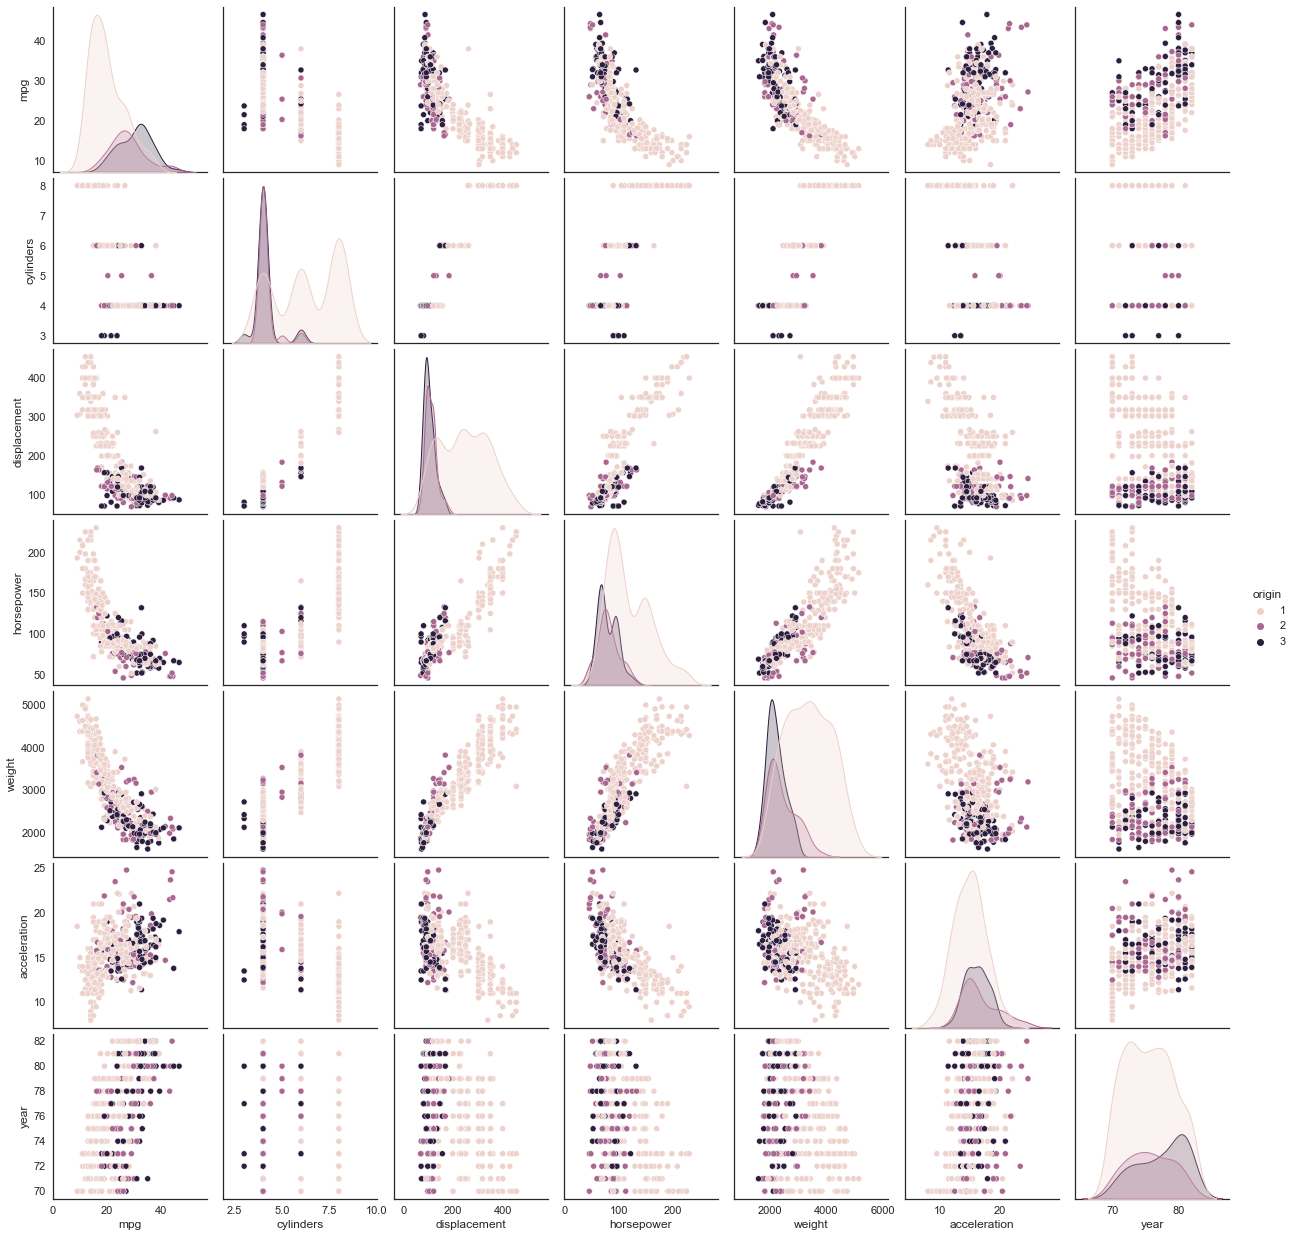

In [359]:
sns.pairplot(auto_df.drop(columns = ["name"]), hue = "origin")

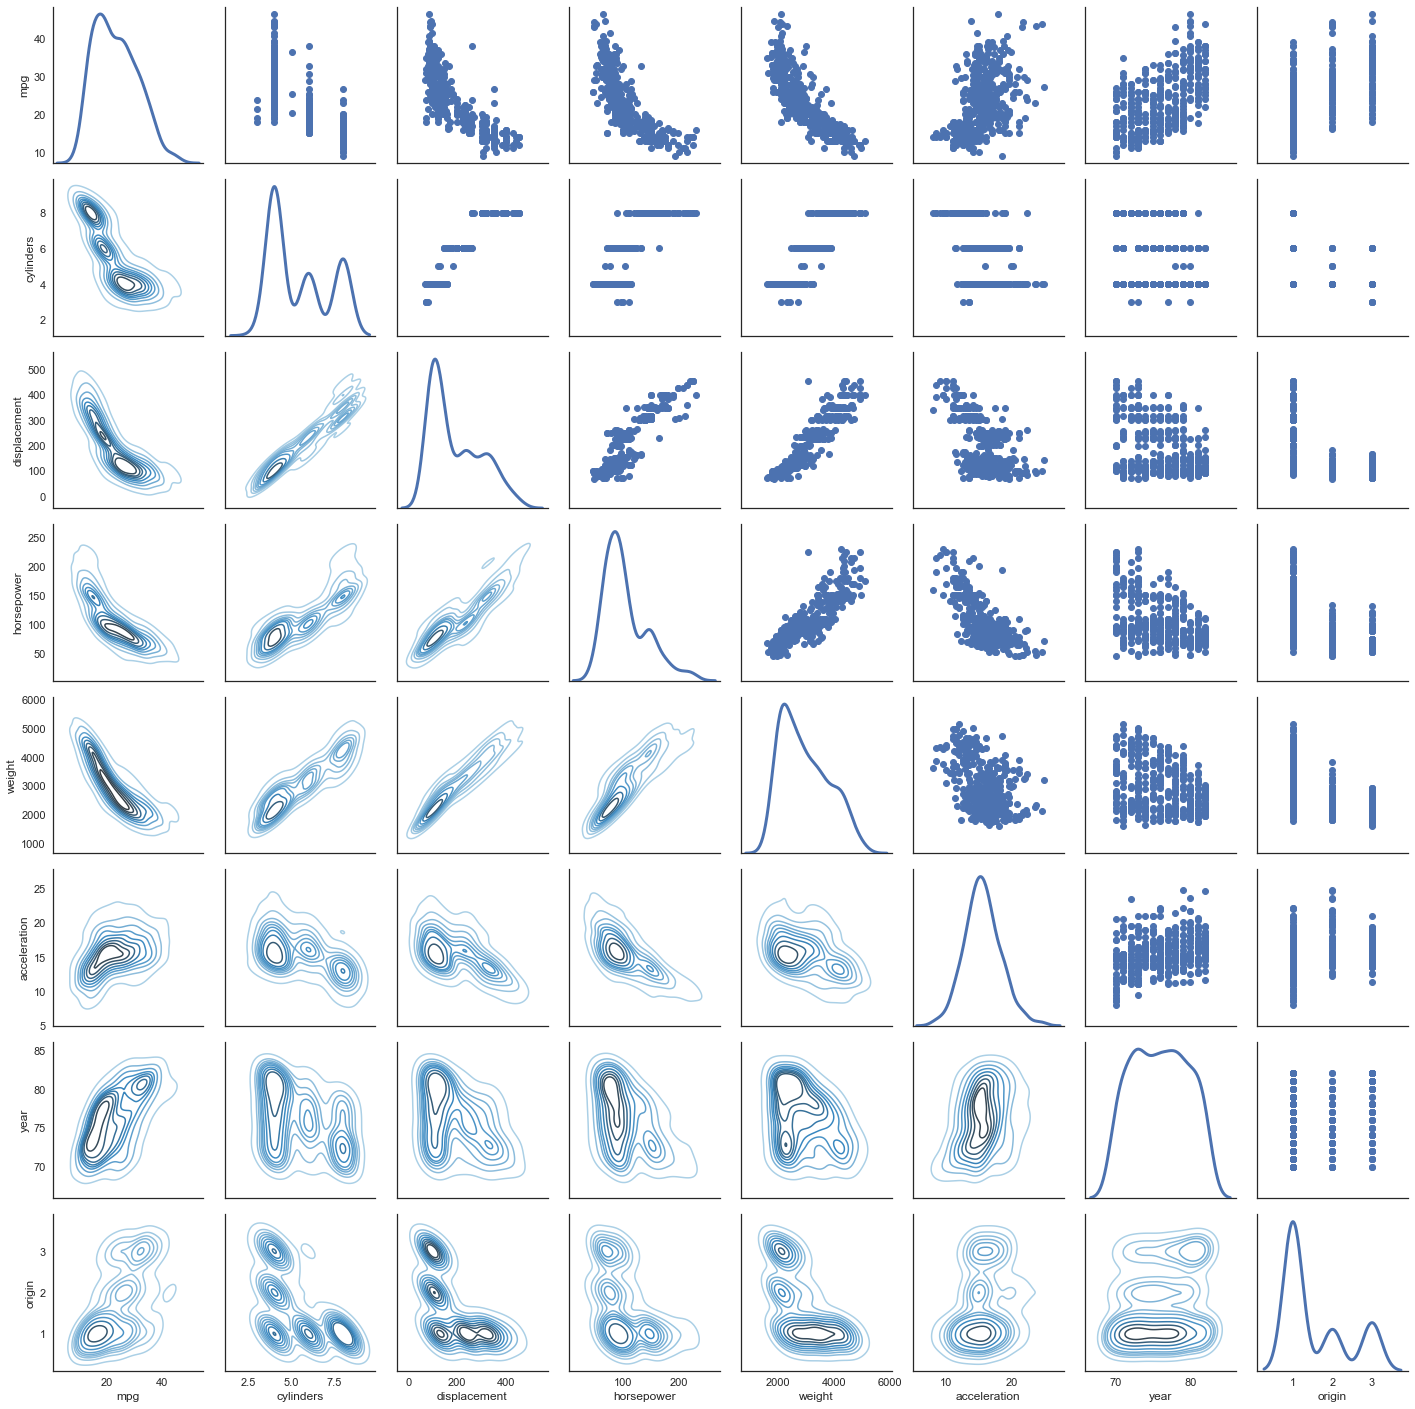

In [360]:
#Another style of the scatterplot graphics.
# http://seaborn.pydata.org/generated/seaborn.PairGrid.html

graphs = sns.PairGrid(auto_df, diag_sharey=False)
graphs.map_lower(sns.kdeplot, cmap="Blues_d")
graphs.map_upper(plt.scatter)
graphs.map_diag(sns.kdeplot, lw=3, legend=False);

### 3.9b Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [361]:
#The DataFrame.corr() method takes care of excluding non-numeric data.
# pandas' corr() function takes care of excluding non numeric data: 
# https://github.com/pandas-dev/pandas/blob/v0.19.2/pandas/core/frame.py#L4721

auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


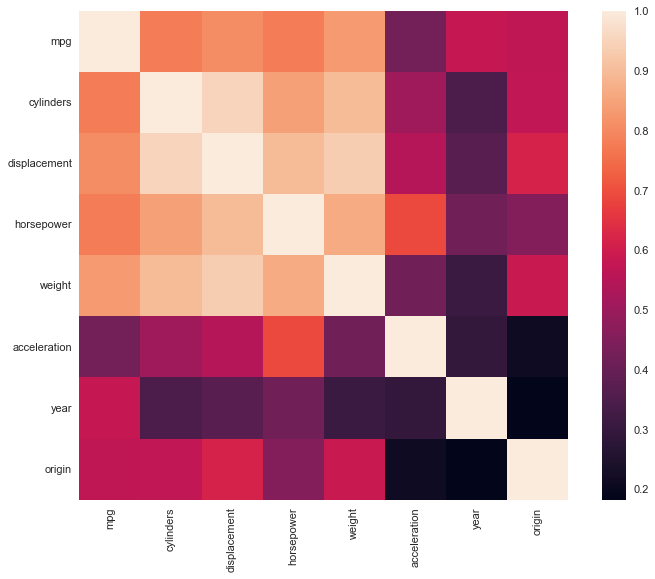

In [362]:
#Additional practice in using a heatmap.

corr_matrix = auto_df.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

### 3.9c.  Use the smf.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output.

In [363]:
reg = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', auto_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          2.04e-139
Time:                        19:03:48   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.9c(i) Is there a relationship between the predictors and the response?  Use the anova_lm() function from statsmodels to answer this question.

Yes, there is a relationship between the predictors and the response.  
In the table above, it can be seen that the value of the F-statistic is 224.5 which is much greater than 1,
therefore the null hypothesis of Ho: Bcylinders = Bdisplacement = Bweight = Bacceleration = Byear = Borigin = 0.
The probability that this data would be generated if Ho were tru is Prob(F - Statistic) = 2 x 10**-139, an extremely low value.

### 3.9c(ii) Which predictors appear to have a statistically significant relatiosnhip to the response? 

Based on the table above, the predictors which have a statistically significant relationship with the response can be seen by looking at their p-values.

The predictors that have a statistically significant relationship to the response are 'weight', 'year', 'origin', and 'displacement'.  

The predictors that do not have a statistically significant relationship to the reponse are 'cylinders', horsepower, and 'acceleration'.

### 3.9c(iii) What does the coefficient for the 'year' variable suggest?

The coefficiant of 0.7508 suggests that, on average, when the other variables are held constant, an increase of one year (of production of cars) 
corresponds to an increase of 0.75 of mpg.  This implies that newer cars are becoming more fuel efficient.  
There is a positive relationship between 'year' and 'mpg'.  The reponse variable increases as 'year' increases.

### 3.9d.  Produce some diagnostic plots of the linear regression fit as described in the lab. Comment on any problems seen with the fit.  Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage.

In [364]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'mpg ~ cylinders + \
                 displacement + \
                 horsepower + \
                 weight + \
                 acceleration + \
                 year + \
                 origin'

auto_df.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=auto_df)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


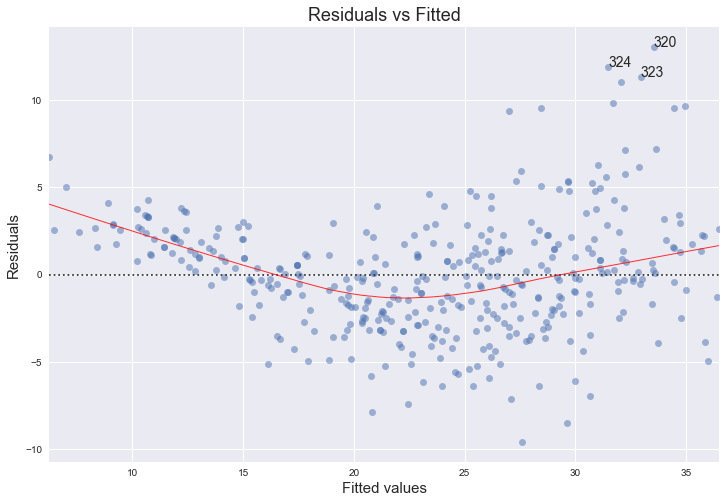

In [365]:
#Residuals Against Fitted Values
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto_df,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

C:\Users\david\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


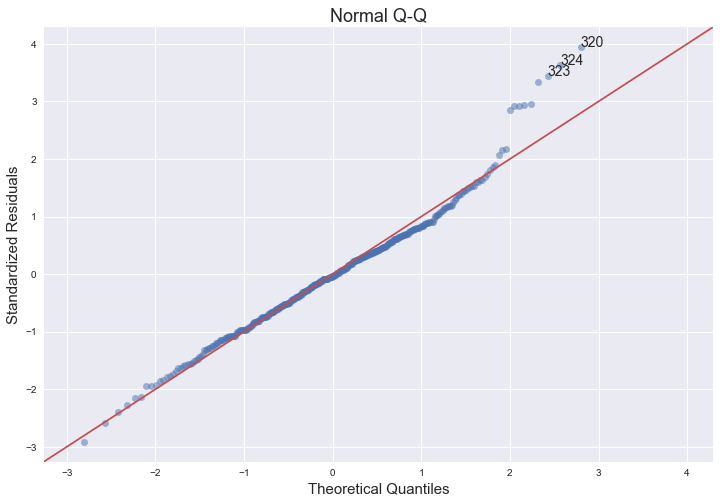

In [366]:
#Normal QQ Plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


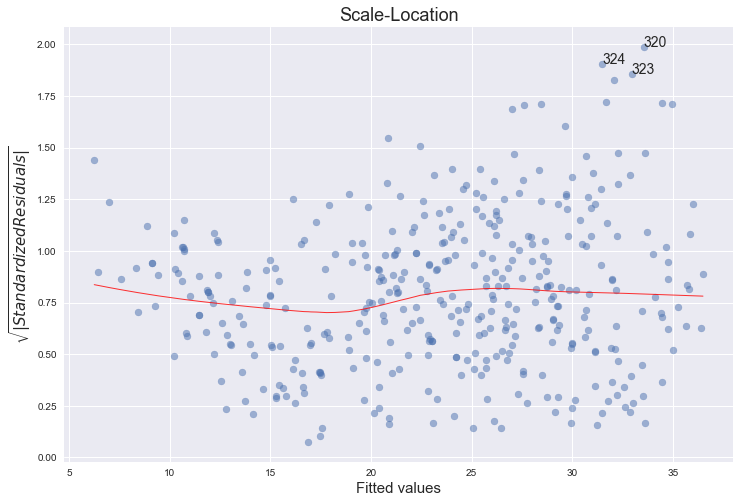

In [367]:
#Scale-Location plot of sqrt(|residuals|) against fitted values

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


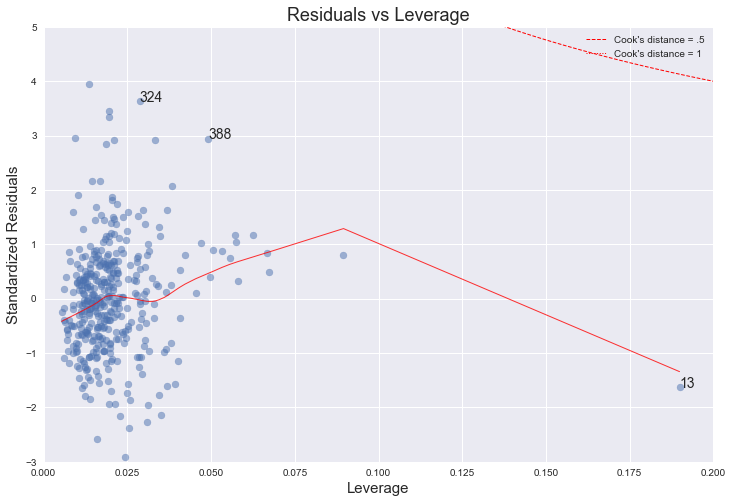

In [368]:
#Residuals Against Leverages

plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');

### Comments
#### Do the residual plots suggest any unusually large outliers?
No, there are no unusually large outliers, as per the the scale log location. They are however skewedly distributed. The larger the fitted value, the larger the variance, since the spread of the residuals increases.

#### Does the leverage plot identify any observations with unusually high leverage?
No, even though there is an observation (number 13) with higher leverage, it is still well within Cook's 0.5 distance.

The normal qq-plot deviates at one extreme, which could indicate that there are other explanatory predictors that we are not considering (quadratic terms, for example). Additionally, the funnel shape of the residuals plot indicates heteroskedacity.

Some pattern in the residuals might suggest some non-linearity in the relationships between the predictors and response that the model is not currently capturing.

We can also see some evidence of observations (e.g. 14) with both high leverage and high residual statistics, that may be disproportionately influencing the regression predictions.

### 3.9e. Fit some models with interactions as described in the lab.  Do any interactions appear to be statistically significant?

In [369]:
reg = smf.ols('mpg ~ horsepower*year + displacement + weight + origin', auto_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     367.0
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          7.51e-156
Time:                        19:03:49   Log-Likelihood:                -987.81
No. Observations:                 392   AIC:                             1990.
Df Residuals:                     385   BIC:                             2017.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -96.6688      9.667    -10.000      0.000    -115.675     -77.663
horsepower          0.7993      0.092      8.687      0.000       0.618       0.980
year                1.8179      0.128     14.221      0.000       1.567       2.069
horsepower:year    -0.0113      0.001     -8.977      0.000      -0.014      -0.009
displacement        0.0068      0.005      1.344      0.180      -0.003       0.017
weight             -0.0054      0.001    -10.170      0.000      -0.006      -0.004
origin              1.1866      0.253      4.684      0.000       0.688       1.685
==============================================================================
Omnibus:                       21.932   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.066
Skew:                           0.411   Prob(JB):                     6.60e-08
Kurtosis:                       4.161   Cond. No.                     5.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [370]:
model = 'mpg ~ displacement + horsepower + origin + weight + year \
               + displacement:horsepower + displacement:origin + displacement:weight + displacement:year \
               + horsepower:origin + horsepower:weight + horsepower:year + origin:weight + origin:year + weight:year'
reg = smf.ols(model, auto_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     184.0
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          1.09e-162
Time:                        19:03:49   Log-Likelihood:                -945.49
No. Observations:                 392   AIC:                             1923.
Df Residuals:                     376   BIC:                             1987.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -51.3746     26.175     -1.963      0.050    -102.843       0.093
displacement               -0.1818      0.120     -1.521      0.129      -0.417       0.053
horsepower                  0.9485      0.232      4.089      0.000       0.492       1.405
origin                     -3.0637      5.496     -0.557      0.578     -13.871       7.744
weight                     -0.0174      0.016     -1.115      0.265      -0.048       0.013
year                        1.3975      0.328      4.267      0.000       0.754       2.042
displacement:horsepower    -0.0001      0.000     -0.815      0.416      -0.000       0.000
displacement:origin         0.0282      0.013      2.172      0.030       0.003       0.054
displacement:weight      2.792e-05   5.99e-06      4.663      0.000    1.61e-05    3.97e-05
displacement:year           0.0010      0.001      0.710      0.478      -0.002       0.004
horsepower:origin          -0.0629      0.020     -3.104      0.002      -0.103      -0.023
horsepower:weight       -1.175e-05   1.77e-05     -0.664      0.507   -4.65e-05     2.3e-05
horsepower:year            -0.0114      0.003     -3.998      0.000      -0.017      -0.006
origin:weight               0.0014      0.001      1.200      0.231      -0.001       0.004
origin:year                 0.0322      0.069      0.464      0.643      -0.104       0.169
weight:year              7.438e-05      0.000      0.394      0.694      -0.000       0.000
==============================================================================
Omnibus:                       52.658   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.208
Skew:                           0.710   Prob(JB):                     9.61e-26
Kurtosis:                       5.244   Cond. No.                     1.81e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comments
These results indicate that the interactions that appear to be statistically significant are displacement:weight, 
horsepower:origin and horsepower:year. Interestingly, when these are considered the only first order terms that are 
statistically different are horsepower and year.

### 3.9f.  Try a few different transformations of the variables, such as log(X), square root of X, X^^2.  Comment on the findings.

In [371]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + weight + year + origin', auto_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     439.5
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          7.11e-157
Time:                        19:03:49   Log-Likelihood:                -988.57
No. Observations:                 392   AIC:                             1989.
Df Residuals:                     386   BIC:                             2013.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.6457      3.915     -1.698      0.090     -14.343       1.052
horsepower                 -0.2441      0.027     -9.099      0.000      -0.297      -0.191
np.power(horsepower, 2)     0.0008   9.13e-05      9.170      0.000       0.001       0.001
weight                     -0.0044      0.000    -10.426      0.000      -0.005      -0.004
year                        0.7456      0.046     16.145      0.000       0.655       0.836
origin                      1.0465      0.238      4.405      0.000       0.579       1.514
==============================================================================
Omnibus:                       21.819   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.447
Skew:                           0.414   Prob(JB):                     9.00e-08
Kurtosis:                       4.140   Cond. No.                     4.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


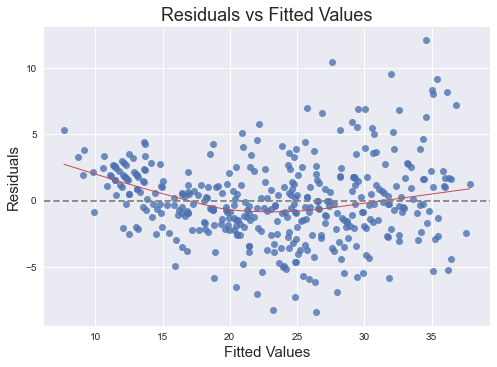

In [372]:
fig = plt.figure()
fitted = reg.fittedvalues
sns.regplot(fitted, auto_df.mpg - fitted,  lowess=True, line_kws={'color':'r', 'lw':1})
ax = fig.axes[0]
ax.axhline(color="grey", ls="--")
ax.set_title("Residuals vs Fitted Values")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals");

In [373]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + weight + year + origin', auto_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     378.6
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          4.62e-158
Time:                        19:03:49   Log-Likelihood:                -982.62
No. Observations:                 392   AIC:                             1979.
Df Residuals:                     385   BIC:                             2007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  80.3681     25.568      3.143      0.002      30.098     130.638
horsepower                  0.2570      0.148      1.737      0.083      -0.034       0.548
np.power(horsepower, 2)    -0.0002      0.000     -0.571      0.568      -0.001       0.000
np.log(horsepower)        -27.5412      8.000     -3.443      0.001     -43.270     -11.812
weight                     -0.0048      0.000    -11.098      0.000      -0.006      -0.004
year                        0.7561      0.046     16.565      0.000       0.666       0.846
origin                      0.9480      0.236      4.016      0.000       0.484       1.412
==============================================================================
Omnibus:                       17.905   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.299
Skew:                           0.312   Prob(JB):                     4.34e-07
Kurtosis:                       4.185   Cond. No.                     2.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comment
The p-value for the squared term is very large.  This indicates that there is non-linearity, 
but it seems to be better captured by the logarithm than by the square.

Comment
It is clear that the quadradic terms is statistically significant.

The next round includes a logarithmic term as well.

In [374]:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + np.sqrt(horsepower) + weight + year + origin', auto_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     332.9
Date:                Fri, 16 Feb 2024   Prob (F-statistic):          9.16e-159
Time:                        19:03:49   Log-Likelihood:                -977.89
No. Observations:                 392   AIC:                             1972.
Df Residuals:                     384   BIC:                             2004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -426.3991    167.288     -2.549      0.011    -755.314     -97.485
horsepower                  8.4452      2.676      3.156      0.002       3.184      13.706
np.power(horsepower, 2)    -0.0060      0.002     -3.117      0.002      -0.010      -0.002
np.log(horsepower)        416.0064    144.951      2.870      0.004     131.009     701.004
np.sqrt(horsepower)      -229.6161     74.927     -3.065      0.002    -376.934     -82.298
weight                     -0.0048      0.000    -11.229      0.000      -0.006      -0.004
year                        0.7475      0.045     16.522      0.000       0.659       0.836
origin                      0.9088      0.234      3.886      0.000       0.449       1.369
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.804
Skew:                           0.411   Prob(JB):                     6.18e-09
Kurtosis:                       4.281   Cond. No.                     2.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Comment
With the addition of the square root term, the squared term is back to a small p-value indicating 
that it is statistically significant in the presence of the square root and the logarith.

### 3.10. This question is answered using the Carseat data set.

### 3.10a.  Fit a multiple regression model to predict the Sales using Price, Urban, and US

In [375]:
# Load data
from ISLP import load_data

carseats = load_data("carseats")

# No missing values found

# Pre-processing
# Convert quantitive datatypes to numerics
datatypes = {'quant': ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'],
             'qual': ['ShelveLoc', 'Urban', 'US']}
# Use floats for all quantitive values
quants = carseats[datatypes['quant']].astype(np.float_)
carseats_df = pd.concat([quants, carseats[datatypes['qual']]], axis=1)

carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,Bad,Yes,Yes
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,Good,Yes,Yes
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,Medium,Yes,Yes
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,Medium,Yes,Yes
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,Bad,Yes,No


In [376]:
# Feature engineering
f = 'Sales ~ Price + C(Urban) + C(US)'
y, X = patsy.dmatrices(f, carseats_df, return_type='dataframe')

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# Make predictions
y_pred = np.array(model.predict(X))


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           2.39e-23
Time:                        19:03:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     

### 3.10b. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

Our model suggests that:

- Sales decrease with increase in Price. For each unit increase in Price, Sales decrease by `0.0545 * 1000 = 54.5 dollars` on average.
- There seems to be a statistically significant relationship between Sales and whether the store is in the U.S. or not. We expect carseats sold in the US to achieve a salprice 1,200 dollars higher on average.
- There does not seem to be significant relationship between Sales and wheter the store is in an urban or rural relationship

### 3.10c. Write out the model in equation form, being careful to handle the qualitative variables properly.

$\hat{y} = 13.0435 + (-0.0219 \times Urban) + (1.2006 \times US) + (-0.0545 \times Price) $

Where Urban and US are encoded as dummy variables:

- Urban: Yes => 1
- Urban:No   => 0
- US: Yes    => 1
- US: No     => 0

### 3.10d. For which of the predictors can you reject the null hypothesis H0 :βj =0?

US, Price

### 3.10e. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [377]:
# Feature engineering
f = 'Sales ~ Price + C(US)'
y, X = patsy.dmatrices(f, carseats_df, return_type='dataframe')

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# Make predictions
y_pred = np.array(model.predict(X))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           2.66e-24
Time:                        19:03:49   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652   

### 3.10f. How well do the models in (a) and (e) fit the data?

Removing the Urban from the first model, there is no change in the R2 value in the second model. Through this we can also conclude that Urban has no say in the prediction of the response, hence its better to use the model with two predictors.


**Comment:** The diagnostic plots above illustrate the fit of our model. The top-left plot shows only subtle discernible pattern suggesting our linear model has achieved a reasonable fit to the data. The distribution of residuals appears normal and there is no heteroscedasticity. 

### 3.10g. Using the model from (e), obtain 95% confidence intervals for the coefficient(s) using x +/- 2*stddevs(x)

In [378]:
coeff_price = -0.0545
std_price = 0.005
range_price = [coeff_price - 2*std_price,coeff_price + 2*std_price]

coeff_US = 1.1996
std_US = 0.258
range_US = [coeff_US - 2*std_US,coeff_US + 2*std_US]

print('With 95% confidence the range for Price coefficient is ',range_price)
print('With 95% confidence the range for US coefficent is ',range_US)

With 95% confidence the range for Price coefficient is  [-0.0645, -0.0445]
With 95% confidence the range for US coefficent is  [0.6836, 1.7156]


### 3.10h. Is there evidence of outliers or high leverage observations in the model from (e)?

No observations exceed the studentised residual thresholds for outliers of +/-3, although a couple come close.

There is one observation that stands out as particularly high leverage in the bottom-right plot above, but this observation is not an outlier.

## 3.12. This problem involves simple linear regression without an intercept.

### 3.12a. Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?


when 

$\sum_{i=1}^{n} x_i = \sum_{i=1}^{n} y_i$

in which case $\hat{β} = 1$

### 3.12b. Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

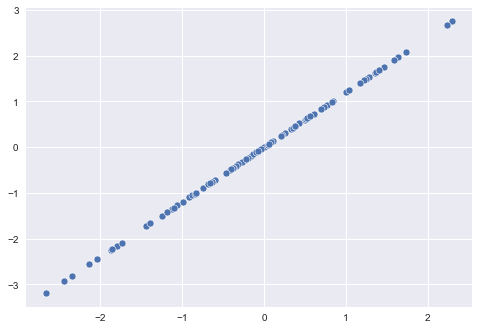

In [379]:
#import numpy as np
#import pandas as pd
#import seaborn as sns; sns.set()
#import statsmodels.formula.api as smf

np.random.seed(2)
x = np.random.normal(size=100)
y = 1.2*x
df = pd.DataFrame({'x': x, 'y': y})
sns.scatterplot(x=x, y=y);

In [380]:
model_a = smf.ols(formula='y ~ x', data=df).fit()
model_b = smf.ols(formula='x ~ y', data=df).fit()

print(model_a.params)
print(model_b.params)

Intercept   -1.942890e-16
x            1.200000e+00
dtype: float64
Intercept    1.387779e-17
y            8.333333e-01
dtype: float64


### 3.12c. Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.


Intercept   -2.775558e-17
x            1.000000e+00
dtype: float64
Intercept   -2.775558e-17
y            1.000000e+00
dtype: float64


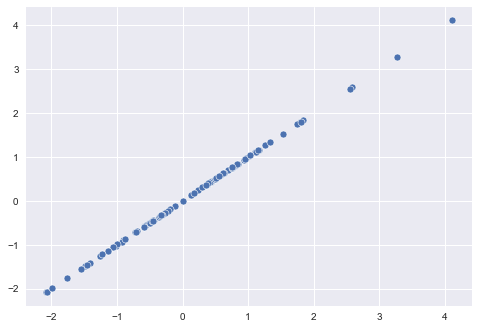

In [381]:
x = np.random.normal(size=100)
y = x
df = pd.DataFrame({'x': x, 'y': y})
sns.scatterplot(x=x, y=y);

model_a = smf.ols(formula='y ~ x', data=df).fit()
model_b = smf.ols(formula='x ~ y', data=df).fit()

print(model_a.params)
print(model_b.params)

### Both the coefficients are same aafter running the models.